# Visualize TSE, R and S for brain data (coarse grained option)
While using the MI to determine the amount of synergy and redundancy dominance

In [8]:
# Import libraries
from functions import *
import sys
import io
from contextlib import redirect_stdout

In [10]:
# Import data
df = pd.read_csv("C:\\Users\\cyril\\Documents\\Personal\\Github\\PhD_1\\Data\\100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt", sep='\t', header=None, usecols=lambda col: col != 'Time')
df = df.transpose()

window_size = 1000
window_step = 100
dimension_max = 4
dimension_tot = 8

In [11]:
# Run function while suppressing the printed output from interactions_values
with io.StringIO() as buffer, redirect_stdout(buffer):
    df = interactions_values(df, window_size, window_step, dimension_max, dimension_tot)

2025-02-17 09:54:32,948 : INFO : PROGRESS: at percent #0
2025-02-17 09:54:32,951 : INFO : PROGRESS: at percent #1
2025-02-17 09:54:32,953 : INFO : PROGRESS: at percent #1
2025-02-17 09:54:32,955 : INFO : PROGRESS: at percent #2
2025-02-17 09:54:32,956 : INFO : PROGRESS: at percent #3
2025-02-17 09:54:32,956 : INFO : PROGRESS: at percent #3
2025-02-17 09:54:32,956 : INFO : PROGRESS: at percent #4
2025-02-17 09:54:32,964 : INFO : PROGRESS: at percent #4
2025-02-17 09:54:32,967 : INFO : PROGRESS: at percent #5
2025-02-17 09:54:32,967 : INFO : PROGRESS: at percent #6
2025-02-17 09:54:32,973 : INFO : PROGRESS: at percent #6
2025-02-17 09:54:32,977 : INFO : PROGRESS: at percent #7
2025-02-17 09:54:32,982 : INFO : PROGRESS: at percent #8
2025-02-17 09:54:32,984 : INFO : PROGRESS: at percent #8
2025-02-17 09:54:32,988 : INFO : PROGRESS: at percent #9
2025-02-17 09:54:32,989 : INFO : PROGRESS: at percent #9
2025-02-17 09:54:32,989 : INFO : PROGRESS: at percent #10
2025-02-17 09:54:32,996 : INFO

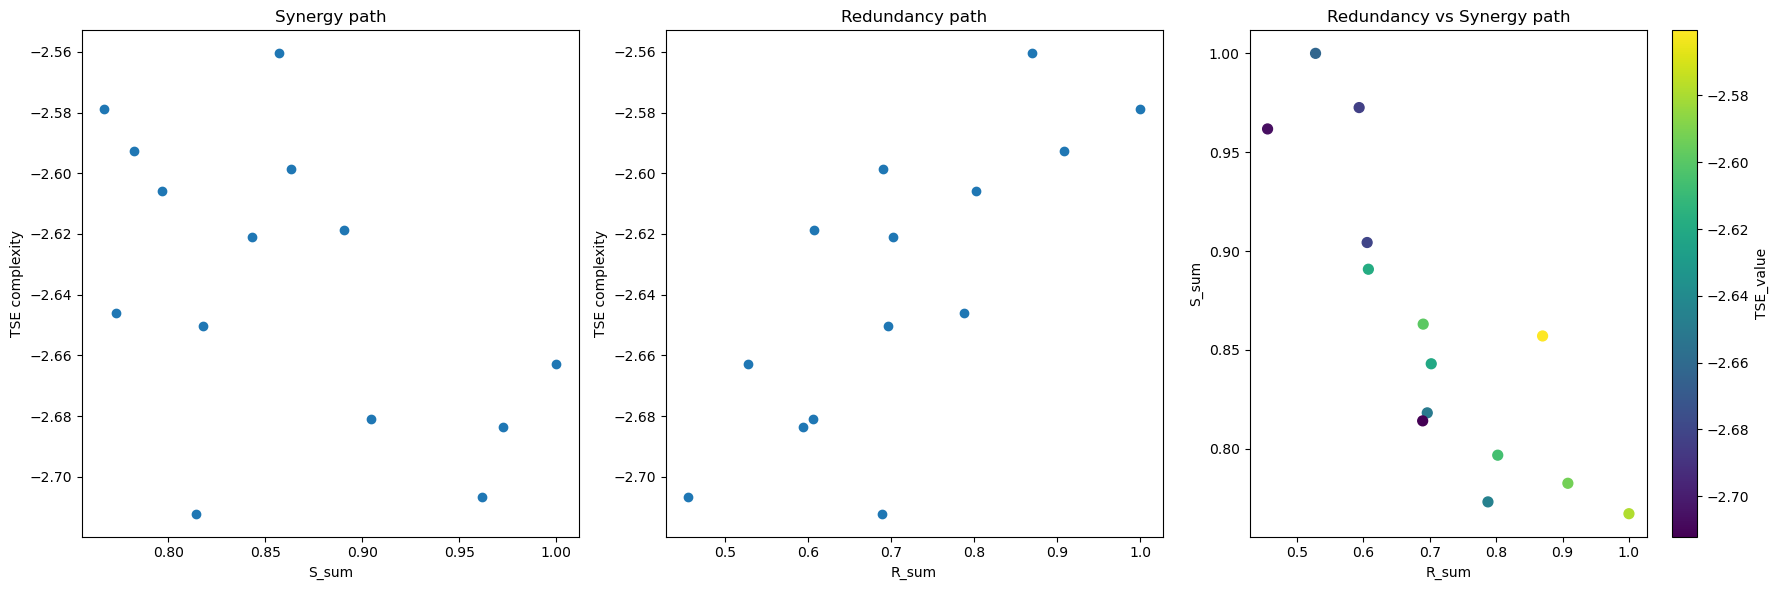

In [12]:
# Create a figure with 1 row and 3 columns for subplots
plt.figure(figsize=(18, 6))

# First subplot for Synergy path
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.scatter(df['S_sum'], df['TSE_value'])
plt.xlabel('S_sum')
plt.ylabel('TSE complexity')
plt.title('Synergy path')

# Second subplot for Redundancy path
plt.subplot(1, 3, 2)
plt.scatter(df['R_sum'], df['TSE_value'])
plt.xlabel('R_sum')
plt.ylabel('TSE complexity')
plt.title('Redundancy path')

# Third subplot for Redundancy vs Synergy path
plt.subplot(1, 3, 3)
plt.scatter(df['R_sum'], df['S_sum'], c=df['TSE_value'], cmap='viridis', s=50)
plt.colorbar(label='TSE_value')
plt.xlabel('R_sum')
plt.ylabel('S_sum')
plt.title('Redundancy vs Synergy path')

# Adjust layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

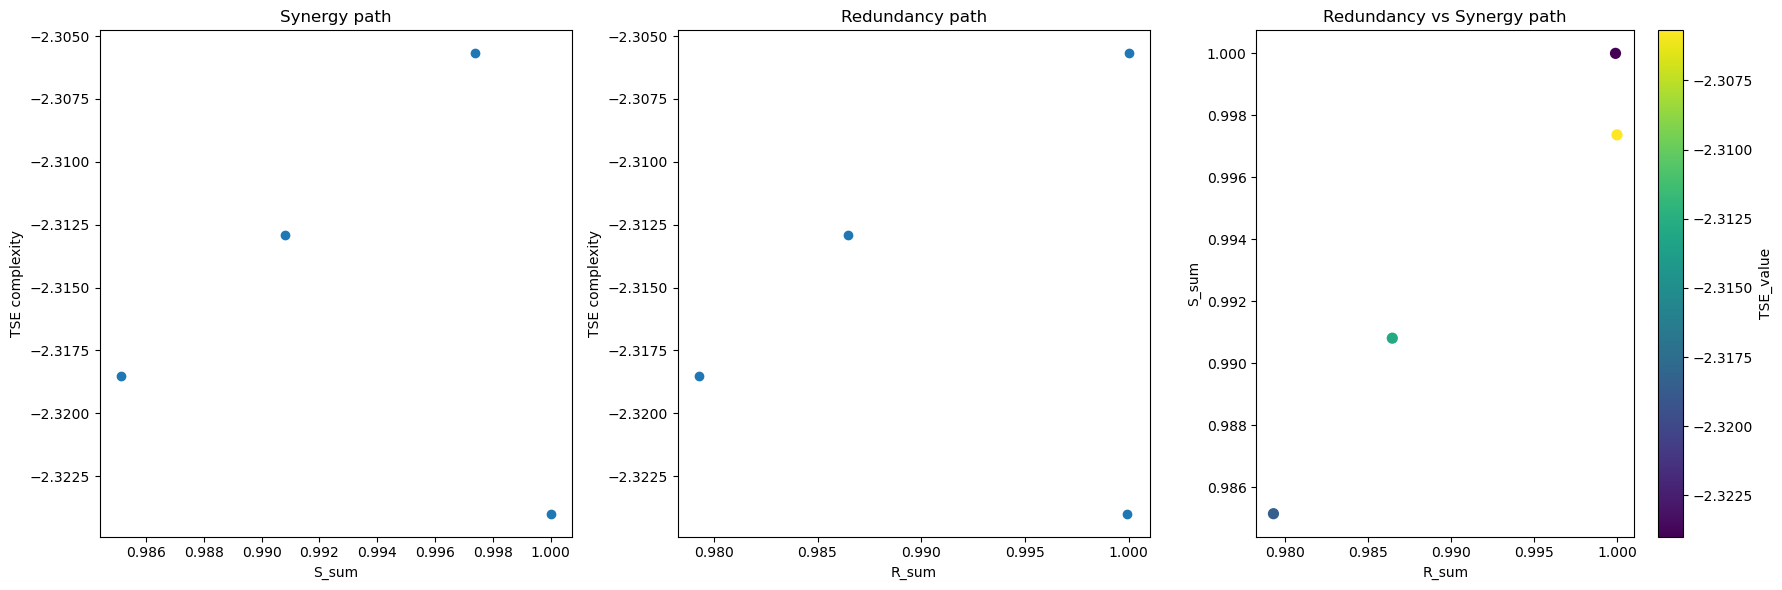

In [6]:
# Create a figure with 1 row and 3 columns for subplots
plt.figure(figsize=(18, 6))

# First subplot for Synergy path
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.scatter(df['S_sum'], df['TSE_value'])

# Fit a linear regression line
slope, intercept = np.polyfit(df['S_sum'], df['TSE_value'], 1)  # 1 indicates linear fit
line_x = np.linspace(min(df['S_sum']), max(df['S_sum']), 100)  # Create x values for the line
line_y = slope * line_x + intercept  # Calculate y values based on the linear equation
#plt.plot(line_x, line_y, color='red')

plt.xlabel('S_sum')
plt.ylabel('TSE complexity')
plt.title('Synergy path')

# Second subplot for Redundancy path
plt.subplot(1, 3, 2)
plt.scatter(df['R_sum'], df['TSE_value'])

# Fit a linear regression line
slope, intercept = np.polyfit(df['R_sum'], df['TSE_value'], 1)  # 1 indicates linear fit
line_x = np.linspace(min(df['R_sum']), max(df['R_sum']), 100)  # Create x values for the line
line_y = slope * line_x + intercept  # Calculate y values based on the linear equation
#plt.plot(line_x, line_y, color='red')

plt.xlabel('R_sum')
plt.ylabel('TSE complexity')
plt.title('Redundancy path')

# Third subplot for Redundancy vs Synergy path
plt.subplot(1, 3, 3)
plt.scatter(df['R_sum'], df['S_sum'], c=df['TSE_value'], cmap='viridis', s=50)
plt.colorbar(label='TSE_value')
plt.xlabel('R_sum')
plt.ylabel('S_sum')
plt.title('Redundancy vs Synergy path')

# Adjust layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()